<a href="https://colab.research.google.com/github/khchoi-physik/pbh_simulations/blob/main/curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp

import os
import glob

In [60]:

# @title Fitting distributions

def gumbel(x,mu,beta):
    z  = (x-mu)/beta
    return beta**(-1) * np.exp( -( z+ np.exp(-z) ) )


def frechet(x,a,s,m):

    return (a/s) * ( (x-m) / s)**(-1-a) * np.exp(- ( (x-m) / s)**(-a) )


def weibull(x,lam,k):

    return (k/lam)*(x/lam)**(k-1) * np.exp(-(x/lam)**k)


def gamma_dist(x,alpha,beta):

    gamma_pdf = ( (beta**alpha) / gamma(alpha) ) * (x**(alpha-1) ) * np.exp(- beta * x)

    return gamma_pdf

def exGPD(x, mu, sigma, zeta):

    y = (x-mu)
    exGPD_pdf = (np.exp(y)/sigma) * ( 1 + (zeta/sigma) * np.exp(y) )**(-1/zeta -1)
    #exGPD_pdf = (1/sigma) * ( 1 + zeta * y)**(-1/zeta -1)

    return exGPD_pdf

In [3]:
# @title Load gdrive

from google.colab import drive
drive.mount('/content/gdrive')

main_path = '/content/gdrive/MyDrive/2023 RFSimulations/simulated_results'
folder_path = main_path + '/block_maxima_data'
gumbel_path = folder_path +'/gumbel'
frechet_path = folder_path +'/frechet'
os.chdir(folder_path)
print(os.getcwd())

Mounted at /content/gdrive
/content/gdrive/MyDrive/2023 RFSimulations/simulated_results/block_maxima_data


In [4]:
# @title Presets

box_sizes = [5,9,10,16,32]
xmin =0
xmax = 35
bins_sizes = 501
xrange = np.linspace(xmin,xmax,bins_sizes)
colors = ['red', 'blue', 'green', 'black', 'yellow', 'purple', 'orange']

In [ ]:
# @title Gumbel


for l in box_sizes:
    npy_list = glob.glob(f'max_ampligude_l_{l}*.npy')
    print(npy_list)


    fig1, ax1 = plt.subplots(figsize= (12,6))
    fig2, ax2 = plt.subplots(figsize= (12,6))
    fig3, ax3 = plt.subplots(figsize= (12,6))



    for i,npy_file in enumerate(npy_list):
        data = np.load(f'{npy_file}')

        hists, bins = np.histogram(data, density =True, bins= bins_sizes)
        params  = sp.optimize.curve_fit(gumbel, bins[1:], hists)



        ax1.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=npy_file)
        ax2.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Data {npy_file}')#

        ax3.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=f'Data {npy_file}')
        ax3.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Fit {npy_file}', linestyle=':')#


        fig4, ax4 = plt.subplots(figsize= (12,6))
        ax4.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=f'Data {npy_file}')
        ax4.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Fit {npy_file}', linestyle=':')#
        ax4.legend(fontsize= 12)
        ax4.tick_params(axis='both', which='major', labelsize= 12)
        ax4.set_xlabel('Amplitude', fontsize= 18)
        ax4.set_ylabel('Probability density', fontsize= 18)
        ax4.set_title(f'{npy_file}', fontsize= 18)
        ax4.set_xlim(xmin,xmax)

        fig4.savefig(f'Fitted_gumbel_{npy_file}.png')

    ax1.legend(fontsize= 12)
    ax2.legend(fontsize= 12)
    ax3.legend(fontsize= 12)

    ax1.set_title('Data', fontsize= 18)
    ax2.set_title('Fitted gumbel', fontsize= 18)
    ax3.set_title('Data+Fitted gumbel', fontsize= 18)

    ax1.set_xlabel('Amplitude', fontsize= 18)
    ax2.set_xlabel('Amplitude', fontsize= 18)
    ax3.set_xlabel('Amplitude', fontsize= 18)

    ax1.set_ylabel('Probability density', fontsize= 18)
    ax2.set_ylabel('Probability density', fontsize= 18)
    ax3.set_ylabel('Probability density', fontsize= 18)

    ax1.tick_params(axis='both', which='major', labelsize= 12)
    ax2.tick_params(axis='both', which='major', labelsize= 12)
    ax3.tick_params(axis='both', which='major', labelsize= 12)

    ax1.set_xlim(xmin,xmax)
    ax2.set_xlim(xmin,xmax)
    ax3.set_xlim(xmin,xmax)

    fig1.savefig(f'Data_l_{l}.png')
    fig2.savefig(f'Fitted_gumbel_l_{l}.png')
    fig3.savefig(f'Data_Fitted_gumbel_l_{l}.png')
    plt.tight_layout()
    plt.close('all')

['max_ampligude_l_5_k_2.npy', 'max_ampligude_l_5_k_3.npy', 'max_ampligude_l_5_k_0.npy', 'max_ampligude_l_5_k_1.npy']
['max_ampligude_l_9_k_2.npy', 'max_ampligude_l_9_k_3.npy', 'max_ampligude_l_9_k_0.npy', 'max_ampligude_l_9_k_1.npy']
['max_ampligude_l_10_k_0.npy', 'max_ampligude_l_10_k_1.npy', 'max_ampligude_l_10_k_2.npy', 'max_ampligude_l_10_k_3.npy']
['max_ampligude_l_16_k_3.npy', 'max_ampligude_l_16_k_2.npy', 'max_ampligude_l_16_k_1.npy', 'max_ampligude_l_16_k_0.npy']
['max_ampligude_l_32_k_1.npy', 'max_ampligude_l_32_k_0.npy', 'max_ampligude_l_32_k_3.npy', 'max_ampligude_l_32_k_2.npy']


In [ ]:
# @title Gumbel with different spectral index

k_power_list = [0,1,2,3]

def sort_key(filename):
    # Split by underscores and take the part after 'l_'
    return int(filename.split('_')[3])

for k_power in k_power_list:
    npy_list_unordered = glob.glob(f'max_ampligude_*_k_{k_power}*.npy')
    npy_list = sorted(npy_list_unordered, key= sort_key )

    print(npy_list)

    fig1, ax1 = plt.subplots(figsize= (12,6))
    fig2, ax2 = plt.subplots(figsize= (12,6))
    fig3, ax3 = plt.subplots(figsize= (12,6))


    for i,npy_file in enumerate(npy_list):
        data = np.load(f'{npy_file}')

        hists, bins = np.histogram(data, density =True, bins= bins_sizes)
        params  = sp.optimize.curve_fit(gumbel, bins[1:], hists)


        ax1.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=npy_file)
        ax2.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Data {npy_file}')#

        ax3.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=f'Data {npy_file}')
        ax3.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Fit {npy_file}', linestyle=':')#


        fig4, ax4 = plt.subplots(figsize= (12,6))
        ax4.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=f'Data {npy_file}')
        ax4.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Fit {npy_file}', linestyle=':')#
        ax4.legend(fontsize= 12)
        ax4.tick_params(axis='both', which='major', labelsize= 12)
        ax4.set_xlabel('Amplitude', fontsize= 18)
        ax4.set_ylabel('Probability density', fontsize= 18)
        ax4.set_title(f'{npy_file}', fontsize= 18)
        ax4.set_xlim(xmin,xmax)

        fig4.savefig(f'Fitted_gumbel_{npy_file}.png')

    ax1.legend(fontsize= 12)
    ax2.legend(fontsize= 12)
    ax3.legend(fontsize= 12)

    ax1.set_title('Data', fontsize= 18)
    ax2.set_title('Fitted gumbel', fontsize= 18)
    ax3.set_title('Data+Fitted gumbel', fontsize= 18)

    ax1.set_xlabel('Amplitude', fontsize= 18)
    ax2.set_xlabel('Amplitude', fontsize= 18)
    ax3.set_xlabel('Amplitude', fontsize= 18)

    ax1.set_ylabel('Probability density', fontsize= 18)
    ax2.set_ylabel('Probability density', fontsize= 18)
    ax3.set_ylabel('Probability density', fontsize= 18)

    ax1.tick_params(axis='both', which='major', labelsize= 12)
    ax2.tick_params(axis='both', which='major', labelsize= 12)
    ax3.tick_params(axis='both', which='major', labelsize= 12)

    ax1.set_xlim(xmin,xmax)
    ax2.set_xlim(xmin,xmax)
    ax3.set_xlim(xmin,xmax)

    fig1.savefig(f'Data_k_{k_power}.png')
    fig2.savefig(f'Fitted_gumbel_k_{k_power}.png')
    fig3.savefig(f'Data_Fitted_gumbel_k_{k_power}.png')
    plt.tight_layout()
    plt.close('all')

['max_ampligude_l_5_k_0.npy', 'max_ampligude_l_9_k_0.npy', 'max_ampligude_l_10_k_0.npy', 'max_ampligude_l_16_k_0.npy', 'max_ampligude_l_32_k_0.npy', 'max_ampligude_l_48_k_0.npy']
['max_ampligude_l_3_k_1.npy', 'max_ampligude_l_4_k_1.npy', 'max_ampligude_l_5_k_1.npy', 'max_ampligude_l_9_k_1.npy', 'max_ampligude_l_10_k_1.npy', 'max_ampligude_l_16_k_1.npy', 'max_ampligude_l_32_k_1.npy', 'max_ampligude_l_48_k_1.npy']
['max_ampligude_l_4_k_2.npy', 'max_ampligude_l_5_k_2.npy', 'max_ampligude_l_6_k_2.npy', 'max_ampligude_l_7_k_2.npy', 'max_ampligude_l_8_k_2.npy', 'max_ampligude_l_9_k_2.npy', 'max_ampligude_l_10_k_2.npy', 'max_ampligude_l_16_k_2.npy', 'max_ampligude_l_32_k_2.npy']
['max_ampligude_l_5_k_3.npy', 'max_ampligude_l_9_k_3.npy', 'max_ampligude_l_10_k_3.npy', 'max_ampligude_l_16_k_3.npy', 'max_ampligude_l_32_k_3.npy', 'max_ampligude_l_48_k_3.npy']


['max_ampligude_l_16_k_3.npy', 'max_ampligude_l_16_k_2.npy', 'max_ampligude_l_16_k_1.npy', 'max_ampligude_l_16_k_0.npy']


[]
(array([6.49114343, 2.03821306]), array([[7.61057034e-05, 1.20723490e-05],
       [1.20723490e-05, 5.25713545e-05]])) (array([ 26042.61491156,  53080.33533885, -53073.84415397]), array([[ 2.80745478e+11,  5.71893671e+11, -5.71893662e+11],
       [ 5.71893671e+11,  1.16497827e+12, -1.16497825e+12],
       [-5.71893662e+11, -1.16497825e+12,  1.16497823e+12]])) (array([7.80559125, 3.58422793]), array([[2.17650021e-04, 1.97790594e-05],
       [1.97790594e-05, 3.70530807e-04]]))


<ipython-input-60-e49319473253>:15: RuntimeWarning: invalid value encountered in power
  return (k/lam)*(x/lam)**(k-1) * np.exp(-(x/lam)**k)


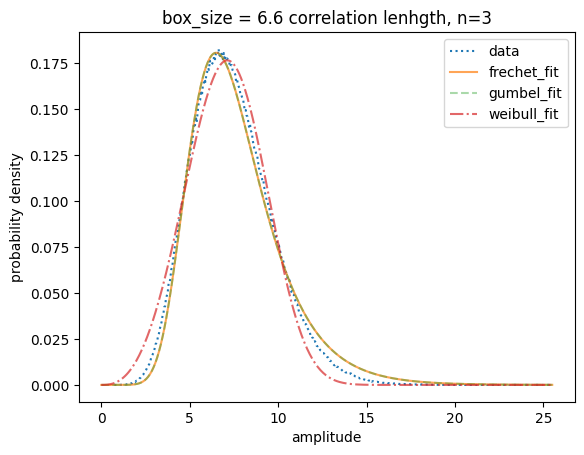

In [85]:
 # @title Other EVD Fitting ( Weibull & Frechet)

l = 16
npy_list = glob.glob(f'max_ampligude_l_{l}*.npy')
print(npy_list)


os.chdir(folder_path)
data = np.load(f'max_ampligude_l_16_k_3.npy')
os.chdir(frechet_path)

hists, bins = np.histogram(data, density =True, bins= bins_sizes)
params_frechet = sp.optimize.curve_fit(frechet, bins[1:], hists , p0=[4,9,0]) # fit frechet
params_gumbel  = sp.optimize.curve_fit(gumbel, bins[1:], hists) # fit gumbel
params_weibull = sp.optimize.curve_fit(weibull, bins[1:], hists) # fit weibull

print(params_gumbel, params_frechet, params_weibull)

xrange = np.linspace(0,bins[1:].max(), bins[1:].shape[0]) # define xrange by bin size and bin location

plt.plot(bins[1:],hists, label='data', alpha=1, linestyle = 'dotted') # plot data

plt.plot(xrange, frechet(xrange, *params_frechet[0]), label= 'frechet_fit', alpha=0.7, linestyle = 'solid')  # plot frechet
plt.plot(xrange, gumbel(xrange, *params_gumbel[0]), label= 'gumbel_fit', alpha=0.4, linestyle = 'dashed') # plot gumbel
plt.plot(xrange, weibull(xrange, *params_weibull[0]), label= 'weibull_fit', alpha=0.7, linestyle = 'dashdot') # plot weibull
plt.xlabel('amplitude')
plt.ylabel('probability density')
plt.title(f'box_size = {(2*l+1)/5} correlation lenhgth, n=3')

plt.legend()